<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [83]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [84]:
# insert code here
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [85]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [86]:
# insert code here
import tarfile
fname = "data/cifar-10-python.tar.gz"
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()
# function to read files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
for i in range(5):
    fname = f'cifar-10-batches-py/data_batch_{i+1}'
    data = unpickle(fname)
    X = data[b'data']
    y = data[b'labels']
    exec(f'data_{i+1} = X' )
    exec(f'target_{i+1} = y' )
# combining all the data
data_all = np.concatenate((data_1, data_2, data_3, data_4, data_5), axis=0)
target_all = np.concatenate((target_1, target_2, target_3, target_4, target_5), axis=0)
print(data_all.shape)
# Important!!!
# reshaping the data into 32x32 with 3 layers for red, green and blue (RGB)
data_all = data_all.reshape(data_all.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")
data_all.shape

(50000, 3072)


(50000, 32, 32, 3)

## Check some data

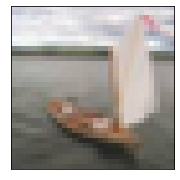

In [87]:
# insert code here
id = np.random.randint(len(data_all))
plt.figure(figsize = (3, 3))
plt.imshow(data_all[id])
plt.xticks([])
plt.yticks([])
plt.show()

## Prepare data

In [88]:
# insert code here
# Do test train split according to documentation on data
# Test batch has been pre-organised in dataset
X_train = data_all
y_train = target_all

# Extract test data
fname = f'cifar-10-batches-py/test_batch'
test_data = unpickle(fname)
X_test = test_data[b'data']
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")
y_test = test_data[b'labels']

# Convert target datasets to categorical
y_train = to_categorical(
    y_train,
    num_classes = len(set(y_train)),
    dtype = 'uint8')

y_test = to_categorical(
    y_test,
    num_classes = len(set(y_test)),
    dtype = 'uint8')

In [89]:
y_train.shape

(50000, 10)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [90]:
# insert code here
model = Sequential()
# layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# dense
model.add(Flatten()), # when in the middle no need to specify the shape because the network will figure it out
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [91]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

## Compile the model

In [94]:
# insert code here
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [95]:
# Uncomment the statement below to allow online monitoring with TensorBoard
import os
import datetime

log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(log_dir)

In [96]:
%%time
# insert code here
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    callbacks=[tensorboard],
    epochs = 10,
    batch_size = 32)

Epoch 1/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7039 - accuracy: 0.4297 - val_loss: 1.5337 - val_accuracy: 0.4508
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.2428 - accuracy: 0.5630 - val_loss: 1.3772 - val_accuracy: 0.5312
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0884 - accuracy: 0.6198 - val_loss: 1.1095 - val_accuracy: 0.6157
Epoch 4/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0021 - accuracy: 0.6489 - val_loss: 1.1115 - val_accuracy: 0.6233
Epoch 5/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9200 - accuracy: 0.6796 - val_loss: 1.0981 - val_accuracy: 0.6248
Epoch 6/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8529 - accuracy: 0.7038 - val_loss: 1.1838 - val_accuracy: 0.6136
Epoch 7/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.7842 - accuracy: 0.7272 - val_loss: 1.1667 -

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [97]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 20796), started 3:03:25 ago. (Use '!kill 20796' to kill it.)

## Create predictions

In [98]:
%%time
predictions = model.predict(X_test)

CPU times: total: 3.98 s
Wall time: 1.56 s


## Evaluate the model

In [99]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 32)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

313/313 [==============================] - 2s 5ms/step - loss: 1.2447 - accuracy: 0.6225

Test loss: 1.244668, Test accuracy: 0.622500


## Visualisation of cost

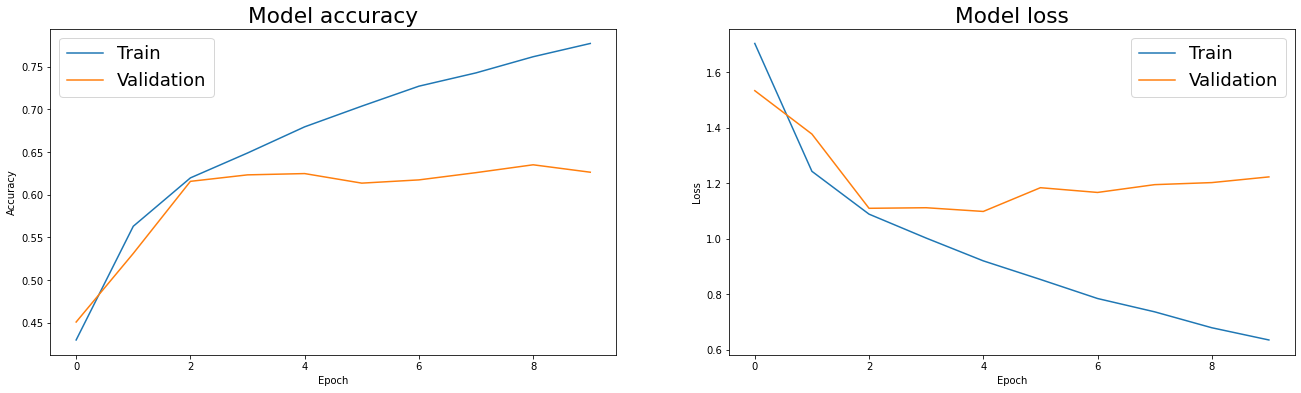

In [100]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

In [103]:
# insert code here
def implot2(im1, im2, id):
    t1 = y_test[id].argmax()
    t2 = predictions[id]

    fig, ax = plt.subplots(1, 2, figsize = (6, 3))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.85, wspace = 0.2)
    fig.suptitle('Prediction %d' % id, fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    # original image
    ax[0].imshow(im1)
    ax[0].set_title('Original id: %d' % t1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    # convoluted image
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title('Test id: %d' % t2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

In [119]:
class_predictions = np.argmax(predictions,axis=1)

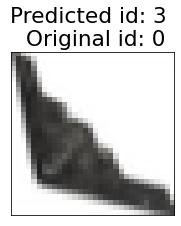

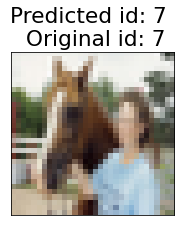

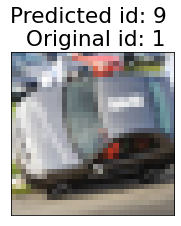

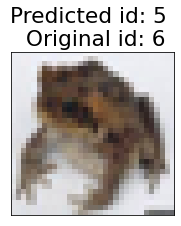

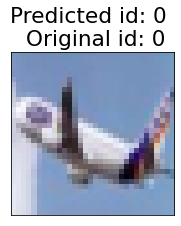

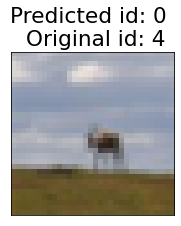

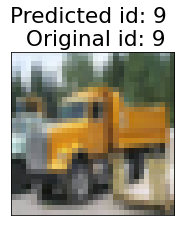

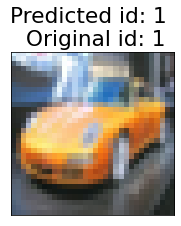

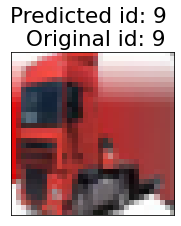

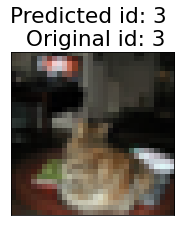

In [130]:
# compare ten
ids = np.random.randint(len(predictions), size = 10)
for id in ids:
    t1 = class_predictions[id]
    t2 = y_test[id].argmax()
    plt.figure(figsize = (3, 3))
    plt.imshow(X_test[id])
    plt.title('Predicted id: {0} \n Original id: {1}'.format(t1, t2))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [131]:
# We can conclude that the model does better than randomly guessing at the correct image class, but there is still a lot of room for improvement



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



